## Import packages

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

## Load Dataset

In [37]:
data = pd.read_csv('merge_stock_news.csv')
data.head()

,Date,Positive,Negative,Neutral,Open,Close,Volume,High,Low,Adj Close,Price_change,Tomorrow_price_change
0,2019-01-02,0.105194,0.008503,0.886303,73.260002,76.956497,159662000,77.667999,73.046501,76.956497,NaN,-1.0
1,2019-01-03,0.008750,0.955784,0.035466,76.000504,75.014000,139512000,76.900002,74.855499,75.014000,-1.0,1.0
2,2019-01-04,0.055253,0.022861,0.921886,76.500000,78.769501,183652000,79.699997,75.915497,78.769501,1.0,1.0
3,2019-01-07,0.136375,0.016877,0.846748,80.115501,81.475502,159864000,81.727997,79.459503,81.475502,1.0,1.0
4,2019-01-08,0.036166,0.016844,0.946990,83.234497,82.829002,177628000,83.830498,80.830498,82.829002,1.0,1.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   698 non-null    object 
 1   Positive               698 non-null    float64
 2   Negative               698 non-null    float64
 3   Neutral                698 non-null    float64
 4   Open                   698 non-null    float64
 5   Close                  698 non-null    float64
 6   Volume                 698 non-null    int64  
 7   High                   698 non-null    float64
 8   Low                    698 non-null    float64
 9   Adj Close              698 non-null    float64
 10  Price_change           697 non-null    float64
 11  Tomorrow_price_change  697 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 65.6+ KB


In [39]:
#change the type of Date to Datetime
data['Date'] =pd.to_datetime(data.Date)
data.describe()

,Positive,Negative,Neutral,Open,Close,Volume,High,Low,Adj Close,Price_change,Tomorrow_price_change
count,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02,698.000000,698.000000,698.000000,697.000000,697.000000
mean,0.215559,0.170496,0.613946,132.359569,132.355255,8.128656e+07,133.788486,130.862810,132.355255,0.076040,0.067432
std,0.181264,0.200950,0.230336,35.890325,35.806238,3.459193e+07,36.305012,35.401733,35.806238,0.997821,0.998440
min,0.008329,0.006506,0.025576,73.260002,75.014000,3.360600e+07,76.900002,73.046501,75.014000,-1.000000,-1.000000
25%,0.074785,0.020499,0.472398,92.584248,92.793499,5.761400e+07,93.585377,91.725122,92.793499,-1.000000,-1.000000
50%,0.156665,0.064352,0.641162,152.202751,151.713753,7.235300e+07,154.155251,149.725502,151.713753,1.000000,1.000000
75%,0.311805,0.284605,0.803182,164.800995,164.699623,9.728150e+07,166.193756,163.177128,164.699623,1.000000,1.000000
max,0.947708,0.963804,0.949012,187.199997,186.570496,3.113460e+08,188.654007,184.839493,186.570496,1.000000,1.000000


## Exploratory Data Analysis

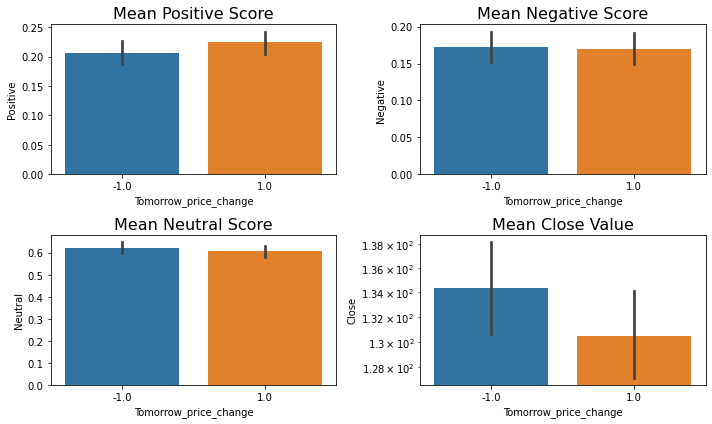

In [41]:
# Visualization of two Tomorrow_price_change groups [-1 ,1]
grouped = data[['Tomorrow_price_change','Positive', 'Negative', 'Neutral', 'Close']].\
               groupby('Tomorrow_price_change').mean().reset_index()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
sns.barplot(x='Tomorrow_price_change', y='Positive', data=data, ax=ax[0][0])
ax[0][0].set_title('Mean Positive Score', fontsize=16)
sns.barplot(x='Tomorrow_price_change', y='Negative', data=data, ax=ax[0][1])
ax[0][1].set_title('Mean Negative Score', fontsize=16)
sns.barplot(x='Tomorrow_price_change', y='Neutral', data=data, ax=ax[1][0])
ax[1][0].set_title('Mean Neutral Score', fontsize=16)
sns.barplot(x='Tomorrow_price_change', y='Close', data=data, ax=ax[1][1])
ax[1][1].set_title('Mean Close Value', fontsize=16)
ax[1][1].set_yscale('log')
plt.tight_layout()
plt.show()

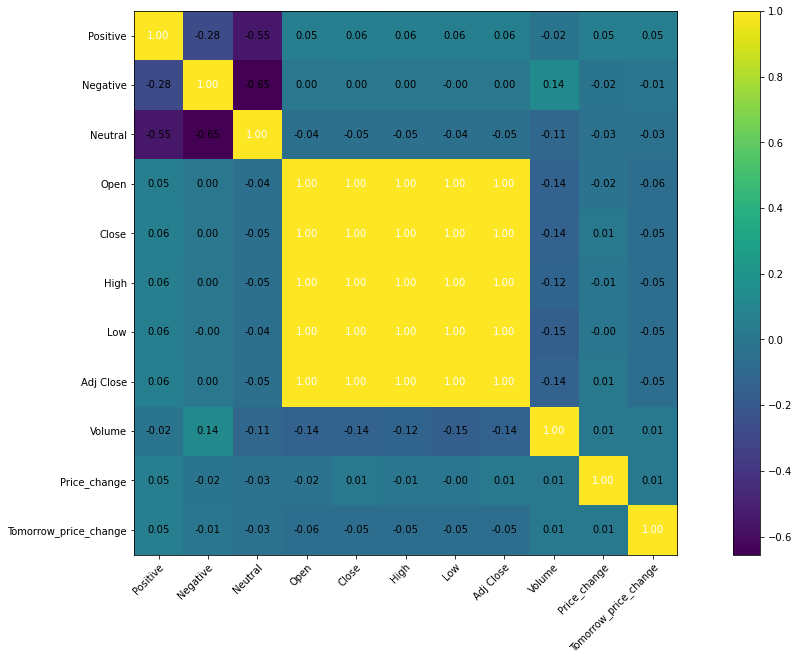

In [42]:
variables = ['Positive','Negative','Neutral','Open',\
                           'Close' ,'High','Low', 'Adj Close','Volume', 'Price_change', 'Tomorrow_price_change']
cm = data[variables].corr().values
hm = heatmap(
    cm,
    row_names=variables,
    column_names=variables,
    figsize=(20, 10))

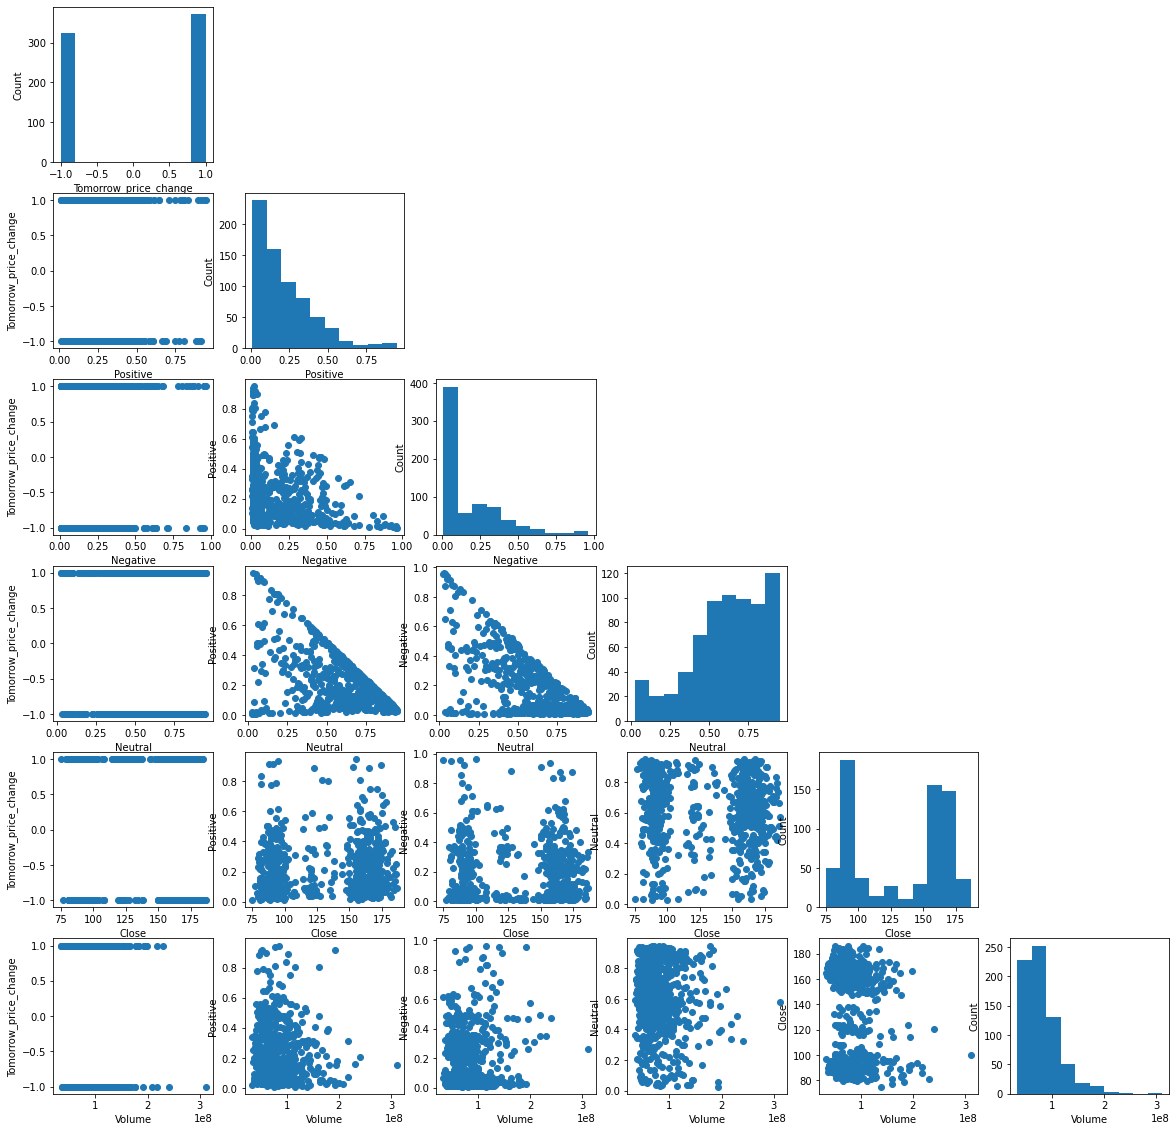

In [44]:
variables = ['Tomorrow_price_change','Positive', 'Negative', 'Neutral', 'Close', 'Volume']

scatterplotmatrix(
    data[variables].values,
    names=variables,
    figsize=(20,20), alpha=1
);